O objetivo deste notebook é replicar parte das simulações reportadas por **Delacre, M., Lakens, D., & Leys, C. (2017). Why psychologists should by default use Welch's t-test instead of Student's t-test. *International Review of Social Psychology*, *30*(1), 92–101. https://doi.org/10.5334/irsp.82**

**Autor: Marcos Lima**

In [4]:
# https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html#statsmodels.stats.weightstats.ttest_ind

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind

**Cenário 1: variâncias iguais (razão entre desvios padrões, SDR = 1) e Ns desiguais (n1 = 40 e n2 = 60). Simulação assume H0 verdadeira.**

In [6]:
# Gera uma semente
np.random.seed(123)

# Parâmetros da simulação
mu, sigma1, sigma2, n1, n2 = 0, 2, 2, 40, 60
SDR = sigma2 / sigma1
alpha = 0.05
student_erro_tipo_I = welch_erro_tipo_I = 0
n_simulacoes = 100_000 # Delacre et al. usaram 1 mi de simulações; reduzi esse valor para 100k

# Lista armazenará os valores p obtidos em cada simulação
ps_student = list()
ps_welch = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos são iguais; logo, H0 é verdadeira
    # portanto, número de resultados significativos deveria ser próximo ao alfa nominal
    grupo1 = np.random.normal(loc = mu, scale = sigma1, size = n1)
    grupo2 = np.random.normal(loc = mu, scale = sigma2, size = n2)

    # Rodando testes t de Student e de Welch
    t_student, p_student, gl_student = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'pooled')
    t_welch, p_welch, gl_welch = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'unequal')

    # se p do Student < alfa, então cometemos um erro do Tipo I
    if p_student < alpha:
        student_erro_tipo_I += 1
    
    # se o p do Welch < alfa, então cometemos um erro do Tipo I        
    if p_welch < alpha:
        welch_erro_tipo_I += 1

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)
    ps_welch.append(p_welch)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {student_erro_tipo_I} ({student_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")
print(f"Em {n_simulacoes} simulações, {welch_erro_tipo_I} ({welch_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Welch foram significativos.")


Em 100000 simulações, 4985 (4.98%) testes t de Student foram significativos.
Em 100000 simulações, 4974 (4.97%) testes t de Welch foram significativos.


**O gráfico a seguir sintetiza as simulações do cenário 1. Não há viés nos testes t de Student e de Welch quando há homoscedasticidade. A taxa de erro do Tipo I é próxima ao valor nominal de 5%. Resultado se aproxima da Figura 3a de Delacre et al. (2017).**

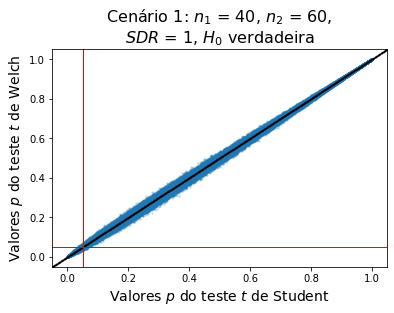

In [7]:
# Gerando um gráfico para os resultados da simulação anterior
x = np.linspace(-0.05, 1.05, 1_000)
y = np.linspace(-0.05, 1.05, 1_000)

plt.scatter(np.array(ps_student), np.array(ps_welch), alpha = 0.20, s = 2)
plt.scatter(x, y, alpha = 1, c = 'black', s = 0.25)

plt.axhline(y = 0.05, linewidth = 1, color = 'r')
plt.axvline(x = 0.05, linewidth = 1, color = 'r')

plt.title("Cenário 1: $\it{n}_{1}$ = 40, $\it{n}_{2}$ = 60,\n$\it{SDR}$ = 1, $\it{H}_{0}$ verdadeira", fontsize = 16)
plt.xlabel('Valores $\it{p}$ do teste $\it{t}$ de Student', fontsize = 14)
plt.ylabel('Valores $\it{p}$ do teste $\it{t}$ de Welch', fontsize = 14)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.savefig('002 - Delacre et al. (2017), Figura 3a.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

**Cenário 2: variâncias desiguais (razão entre desvios padrões, SDR = 2) e Ns iguais (n1 = 50 e n2 = 50). Simulação assume H0 verdadeira.**

In [8]:
# Parâmetros da simulação
mu, sigma1, sigma2, n1, n2 = 0, 2, 4, 50, 50
SDR = sigma2 / sigma1
alpha = 0.05
student_erro_tipo_I = welch_erro_tipo_I = 0
n_simulacoes = 100_000 # Delacre et al. usaram 1 mi de simulações; reduzi esse valor para 100k

# Lista armazenará os valores p
ps_student = list()
ps_welch = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos são iguais; logo, H0 é verdadeira
    # portanto, número de resultados significativos deveria ser próximo ao alfa nominal
    grupo1 = np.random.normal(loc = mu, scale = sigma1, size = n1)
    grupo2 = np.random.normal(loc = mu, scale = sigma2, size = n2)

    # Rodando testes t de Student e de Welch
    t_student, p_student, gl_student = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'pooled')
    t_welch, p_welch, gl_welch = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'unequal')

    # se p do Student < alfa, então cometemos um erro do Tipo I
    if p_student < alpha:
        student_erro_tipo_I += 1
    
    # se o p do Welch < alfa, então cometemos um erro do Tipo I        
    if p_welch < alpha:
        welch_erro_tipo_I += 1

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)
    ps_welch.append(p_welch)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {student_erro_tipo_I} ({student_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")
print(f"Em {n_simulacoes} simulações, {welch_erro_tipo_I} ({welch_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Welch foram significativos.")


Em 100000 simulações, 5110 (5.11%) testes t de Student foram significativos.
Em 100000 simulações, 5016 (5.02%) testes t de Welch foram significativos.


**O gráfico a seguir sintetiza as simulações do cenário 2. Não há viés nos testes t de Student e de Welch quando há heteroscedasticidade (SDR = 2), mas Ns iguais. A taxa de erro do Tipo I é próxima ao valor nominal de 5%. Resultado se aproxima da Figura 3b de Delacre et al. (2017).**

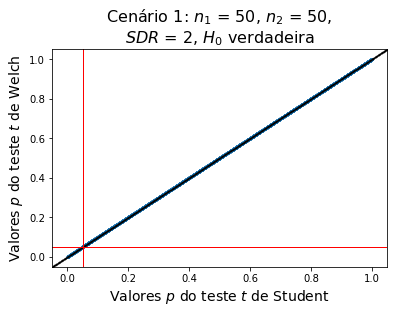

In [9]:
# Gerando um gráfico para os resultados da simulação anterior
x = np.linspace(-0.05, 1.05, 1_000)
y = np.linspace(-0.05, 1.05, 1_000)

plt.scatter(np.array(ps_student), np.array(ps_welch), alpha = 0.20, s = 2)
plt.scatter(x, y, alpha = 1, c = 'black', s = 0.25)

plt.axhline(y = 0.05, linewidth = 1, color = 'r')
plt.axvline(x = 0.05, linewidth = 1, color = 'r')

plt.title("Cenário 1: $\it{n}_{1}$ = 50, $\it{n}_{2}$ = 50,\n$\it{SDR}$ = 2, $\it{H}_{0}$ verdadeira", fontsize = 16)
plt.xlabel('Valores $\it{p}$ do teste $\it{t}$ de Student', fontsize = 14)
plt.ylabel('Valores $\it{p}$ do teste $\it{t}$ de Welch', fontsize = 14)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.savefig('002 - Delacre et al. (2017), Figura 3b.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

**Cenário 3: variâncias desiguais (razão entre desvios padrões, SDR = 2) e Ns desiguais (n1 = 40 e n2 = 60), sendo que a variância maior é a do grupo maior. Simulação assume H0 verdadeira.**

In [10]:
# Parâmetros da simulação
mu, sigma1, sigma2, n1, n2 = 0, 2, 4, 40, 60
SDR = sigma2 / sigma1
alpha = 0.05
student_erro_tipo_I = welch_erro_tipo_I = 0
n_simulacoes = 100_000 # Delacre et al. usaram 1 mi de simulações; reduzi esse valor para 100k

# Lista armazenará os valores p
ps_student = list()
ps_welch = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos são iguais; logo, H0 é verdadeira
    # portanto, número de resultados significativos deveria ser próximo ao alfa nominal
    grupo1 = np.random.normal(loc = mu, scale = sigma1, size = n1)
    grupo2 = np.random.normal(loc = mu, scale = sigma2, size = n2)

    # Rodando testes t de Student e de Welch
    t_student, p_student, gl_student = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'pooled')
    t_welch, p_welch, gl_welch = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'unequal')

    # se p do Student < alfa, então cometemos um erro do Tipo I
    if p_student < alpha:
        student_erro_tipo_I += 1
    
    # se o p do Welch < alfa, então cometemos um erro do Tipo I        
    if p_welch < alpha:
        welch_erro_tipo_I += 1

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)
    ps_welch.append(p_welch)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {student_erro_tipo_I} ({student_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")
print(f"Em {n_simulacoes} simulações, {welch_erro_tipo_I} ({welch_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Welch foram significativos.")

Em 100000 simulações, 2773 (2.77%) testes t de Student foram significativos.
Em 100000 simulações, 4998 (5.00%) testes t de Welch foram significativos.


**O gráfico a seguir sintetiza as simulações do cenário 3. Não há viés no teste t de Welch quando há heteroscedasticidade (SDR = 2) e Ns desiguais (grupo com maior variância é aquele com maior N). No entanto, a taxa de erro do Tipo I do teste t de Student é *MENOR* que o valor nominal de 5%, aproximando-se, no caso da simulação anterior, de 2,77%. Resultado se aproxima da Figura 3c de Delacre et al. (2017).**

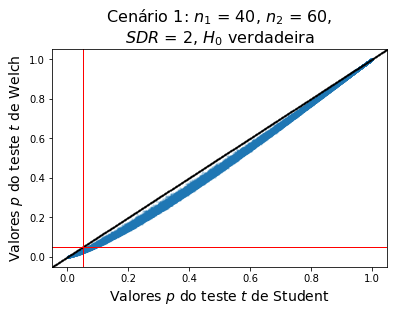

In [11]:
# Gerando um gráfico para os resultados da simulação anterior
x = np.linspace(-0.05, 1.05, 1_000)
y = np.linspace(-0.05, 1.05, 1_000)

plt.scatter(np.array(ps_student), np.array(ps_welch), alpha = 0.20, s = 2)
plt.scatter(x, y, alpha = 1, c = 'black', s = 0.25)

plt.axhline(y = 0.05, linewidth = 1, color = 'r')
plt.axvline(x = 0.05, linewidth = 1, color = 'r')

plt.title("Cenário 1: $\it{n}_{1}$ = 40, $\it{n}_{2}$ = 60,\n$\it{SDR}$ = 2, $\it{H}_{0}$ verdadeira", fontsize = 16)
plt.xlabel('Valores $\it{p}$ do teste $\it{t}$ de Student', fontsize = 14)
plt.ylabel('Valores $\it{p}$ do teste $\it{t}$ de Welch', fontsize = 14)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.savefig('002 - Delacre et al. (2017), Figura 3c.jpg', dpi = 600, bbox_inches = "tight")

plt.show()

**Cenário 4: variâncias desiguais (razão entre desvios padrões, SDR = 0.5) e Ns desiguais (n1 = 40 e n2 = 60), sendo que a variância maior é a do grupo menor. Simulação assume H0 verdadeira.**

In [12]:
# Parâmetros da simulação
mu, sigma1, sigma2, n1, n2 = 0, 2, 1, 40, 60
SDR = sigma2 / sigma1
alpha = 0.05
student_erro_tipo_I = welch_erro_tipo_I = 0
n_simulacoes = 100_000 # Delacre et al. usaram 1 mi de simulações; reduzi esse valor para 100k

# Lista armazenará os valores p
ps_student = list()
ps_welch = list()

# Rodando as simulações
for simulacao in range(0, n_simulacoes):
    # Gerando os dados de cada grupo
    # Note que as médias dos grupos são iguais; logo, H0 é verdadeira
    # portanto, número de resultados significativos deveria ser próximo ao alfa nominal
    grupo1 = np.random.normal(loc = mu, scale = sigma1, size = n1)
    grupo2 = np.random.normal(loc = mu, scale = sigma2, size = n2)

    # Rodando testes t de Student e de Welch
    t_student, p_student, gl_student = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'pooled')
    t_welch, p_welch, gl_welch = ttest_ind(grupo1, grupo2, alternative = 'two-sided', usevar = 'unequal')

    # se p do Student < alfa, então cometemos um erro do Tipo I
    if p_student < alpha:
        student_erro_tipo_I += 1
    
    # se o p do Welch < alfa, então cometemos um erro do Tipo I        
    if p_welch < alpha:
        welch_erro_tipo_I += 1

    # guarda valores ps de cada simulação uma lista
    ps_student.append(p_student)
    ps_welch.append(p_welch)

# Imprime a síntese dos resultados
print(f"Em {n_simulacoes} simulações, {student_erro_tipo_I} ({student_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Student foram significativos.")
print(f"Em {n_simulacoes} simulações, {welch_erro_tipo_I} ({welch_erro_tipo_I / n_simulacoes * 100:.2f}%) testes t de Welch foram significativos.")

Em 100000 simulações, 8449 (8.45%) testes t de Student foram significativos.
Em 100000 simulações, 5062 (5.06%) testes t de Welch foram significativos.


**O gráfico a seguir sintetiza as simulações do cenário 4. Não há viés no teste t de Welch quando há heteroscedasticidade (SDR = 0.5) e Ns desiguais (grupo com maior variância é aquele que tem o maior N). No entanto, a taxa de erro do Tipo I do teste t de Student é *MAIOR* que o valor nominal de 5%, aproximando-se, no caso da simulação anterior, de 8,30%. Resultado se aproxima da Figura 3d de Delacre et al. (2017).**

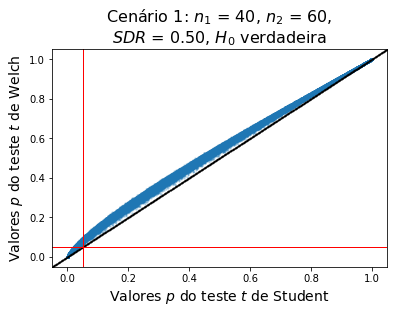

In [13]:
# Gerando um gráfico para os resultados da simulação anterior
x = np.linspace(-0.05, 1.05, 1_000)
y = np.linspace(-0.05, 1.05, 1_000)

plt.scatter(np.array(ps_student), np.array(ps_welch), alpha = 0.20, s = 2)
plt.scatter(x, y, alpha = 1, c = 'black', s = 0.25)

plt.axhline(y = 0.05, linewidth = 1, color = 'r')
plt.axvline(x = 0.05, linewidth = 1, color = 'r')

plt.title("Cenário 1: $\it{n}_{1}$ = 40, $\it{n}_{2}$ = 60,\n$\it{SDR}$ = 0.50, $\it{H}_{0}$ verdadeira", fontsize = 16)
plt.xlabel('Valores $\it{p}$ do teste $\it{t}$ de Student', fontsize = 14)
plt.ylabel('Valores $\it{p}$ do teste $\it{t}$ de Welch', fontsize = 14)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.savefig('002 - Delacre et al. (2017), Figura 3d.jpg', dpi = 600, bbox_inches = "tight")

plt.show()